In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
data=pd.read_csv('VariableDescription.csv')

In [5]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [6]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [7]:
train.shape

(7160, 14)

In [8]:
test.shape

(3069, 13)

In [9]:
test.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [10]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null object
Building_Fenced       3069 non-null object
Garden                3065 non-null object
Settlement            3069 non-null object
Building Dimension    3056 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     2341 non-null float64
NumberOfWindows       3069 non-null object
Geo_Code              3056 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [13]:

test.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [14]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [15]:
#data cleaning
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [16]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [17]:
train = train.drop(['Geo_Code','Garden','Date_of_Occupancy','NumberOfWindows'],axis=1)


In [18]:
train.shape

(7160, 10)

In [19]:
test = test.drop(['Geo_Code','Garden','Date_of_Occupancy','NumberOfWindows'],axis=1)

In [20]:
test.shape

(3069, 9)

In [21]:
test['Building Dimension'].median()

900.0

In [22]:
train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].median())

In [23]:
train['Building Dimension'].isnull().sum()

0

In [24]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Settlement            0
Building Dimension    0
Building_Type         0
Claim                 0
dtype: int64

In [25]:
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].median())

In [26]:
test['Building Dimension'].isnull().sum()

0

In [27]:
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Settlement            0
Building Dimension    0
Building_Type         0
dtype: int64

In [28]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7130    False
7131    False
7132    False
7133    False
7134    False
7135    False
7136    False
7137    False
7138    False
7139    False
7140    False
7141    False
7142    False
7143    False
7144    False
7145    False
7146    False
7147    False
7148    False
7149    False
7150    False
7151    False
7152    False
7153    False
7154    False
7155    False
7156    False
7157    False
7158    False
7159    False
Length: 7160, dtype: bool

In [29]:
test.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
3044    False
3045    False
3046    False
3047    False
3048    False
3049    False
3050    False
3051    False
3052    False
3053    False
3054    False
3055    False
3056    False
3057    False
3058    False
3059    False
3060    False
3061    False
3062    False
3063    False
3064    False
3065    False
3066    False
3067    False
3068    False
Length: 3069, dtype: bool

In [30]:
test['Residential'].value_counts()

0    2381
1     688
Name: Residential, dtype: int64

In [31]:
test.groupby(['Residential','YearOfObservation'])['Residential'].count()

Residential  YearOfObservation
0            2012                 643
             2013                 588
             2014                 431
             2015                 387
             2016                 332
1            2012                 223
             2013                 188
             2014                 126
             2015                  92
             2016                  59
Name: Residential, dtype: int64

In [32]:
train['Residential'].value_counts()

0    4973
1    2187
Name: Residential, dtype: int64

In [33]:
train.groupby(['Residential','Claim'])['Residential'].count()

Residential  Claim
0            0        3926
             1        1047
1            0        1600
             1         587
Name: Residential, dtype: int64

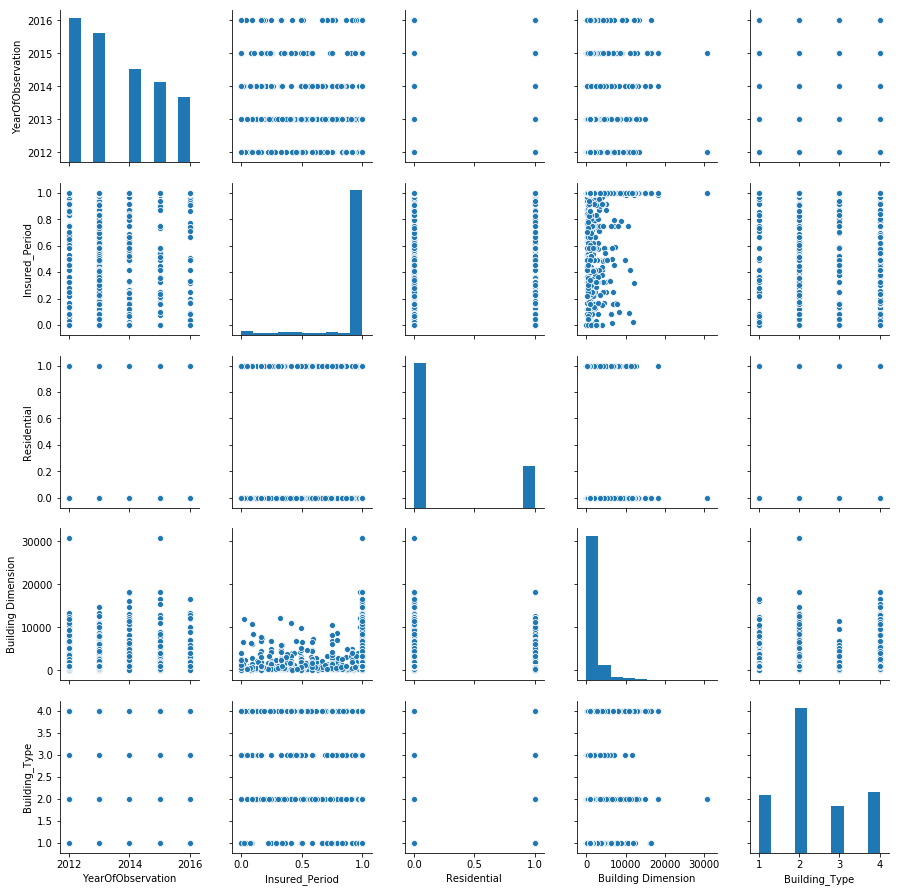

In [34]:
sns.pairplot(test)

C:\Users\user\Anaconda3\Desktop\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


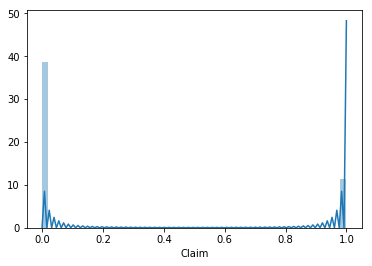

In [35]:
sns.distplot(train['Claim'])

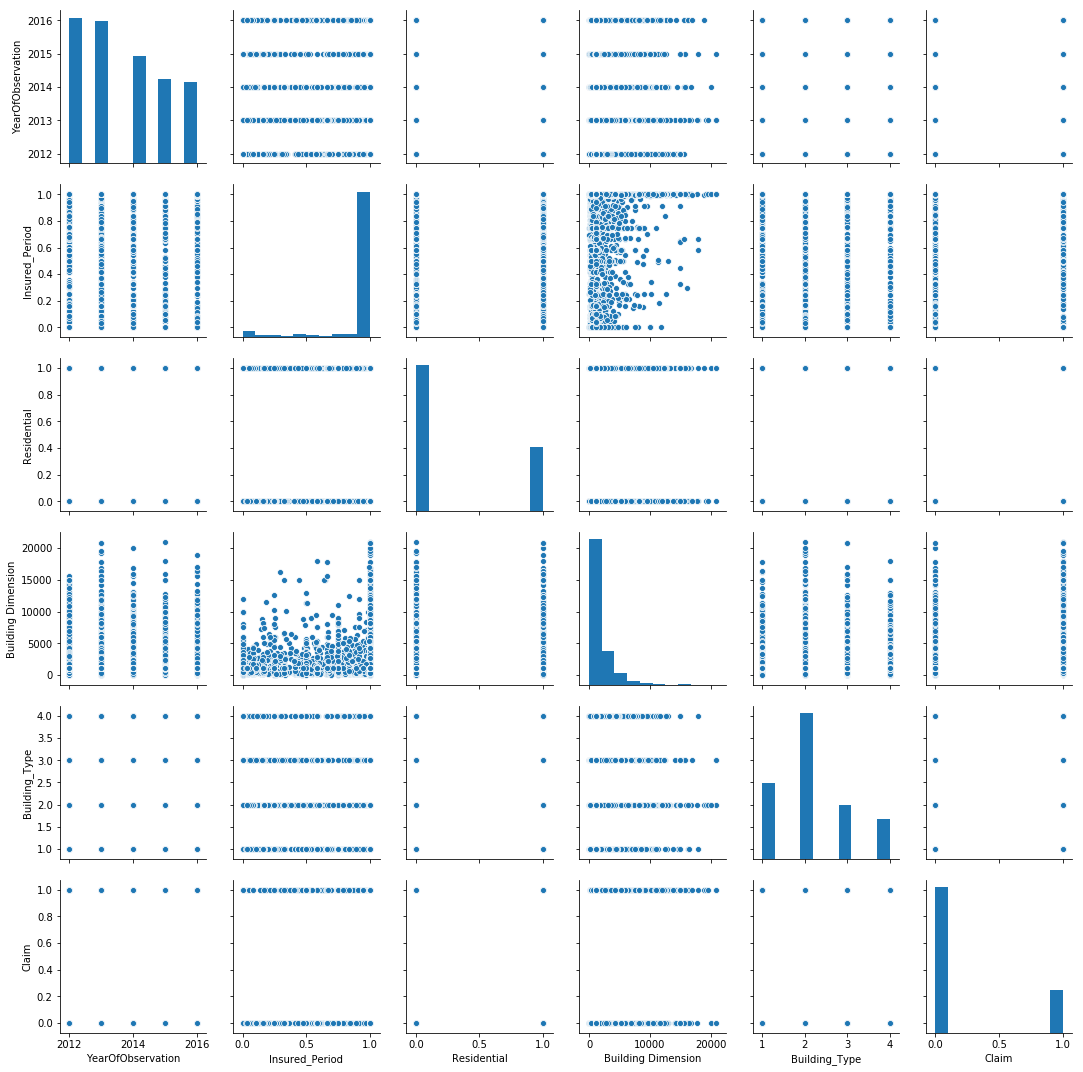

In [36]:
sns.pairplot(train)

In [37]:
#Manual encoding

train['Claim']=train['Claim'].replace('0','0')
train['Claim']=train['Claim'].replace('1','1')

In [38]:
train['Claim']=train['Claim'].astype('int')

In [39]:
#Label encoding

from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
train['Settlement']=le.fit_transform(train['Settlement'])
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type,Claim
0,H14663,2013,1.0,0,N,V,1,290.0,1,0
1,H2037,2015,1.0,0,V,N,0,490.0,1,0
2,H3802,2014,1.0,0,N,V,1,595.0,1,0
3,H3834,2013,1.0,0,V,V,1,2840.0,1,0
4,H5053,2014,1.0,0,V,N,0,680.0,1,0


In [40]:
from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
train['Building_Painted']=le.fit_transform(train['Building_Painted'])
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type,Claim
0,H14663,2013,1.0,0,0,V,1,290.0,1,0
1,H2037,2015,1.0,0,1,N,0,490.0,1,0
2,H3802,2014,1.0,0,0,V,1,595.0,1,0
3,H3834,2013,1.0,0,1,V,1,2840.0,1,0
4,H5053,2014,1.0,0,1,N,0,680.0,1,0


In [41]:
from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
train['Building_Fenced']=le.fit_transform(train['Building_Fenced'])
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type,Claim
0,H14663,2013,1.0,0,0,1,1,290.0,1,0
1,H2037,2015,1.0,0,1,0,0,490.0,1,0
2,H3802,2014,1.0,0,0,1,1,595.0,1,0
3,H3834,2013,1.0,0,1,1,1,2840.0,1,0
4,H5053,2014,1.0,0,1,0,0,680.0,1,0


In [42]:
len(train['Customer Id'].unique())

7160

In [43]:
train.drop('Customer Id',axis=1)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type,Claim
0,2013,1.000000,0,0,1,1,290.0,1,0
1,2015,1.000000,0,1,0,0,490.0,1,0
2,2014,1.000000,0,0,1,1,595.0,1,0
3,2013,1.000000,0,1,1,1,2840.0,1,0
4,2014,1.000000,0,1,0,0,680.0,1,0
5,2012,1.000000,0,1,0,0,535.0,1,0
6,2012,1.000000,0,0,1,1,2830.0,1,0
7,2015,1.000000,0,0,1,1,4952.0,1,0
8,2014,1.000000,0,1,0,0,2735.0,1,1
9,2015,1.000000,0,1,0,0,520.0,1,0


In [44]:
test.drop('Customer Id',axis=1)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,2013,1.000000,0,V,N,R,300.0,1
1,2016,0.997268,0,V,N,R,300.0,1
2,2013,0.369863,0,V,V,U,790.0,1
3,2014,1.000000,0,V,N,R,1405.0,1
4,2016,1.000000,0,V,N,R,1405.0,1
5,2012,1.000000,0,V,V,U,3225.0,2
6,2015,0.986301,0,N,V,U,31.0,2
7,2013,1.000000,0,V,V,U,1400.0,2
8,2012,1.000000,0,V,V,U,1300.0,2
9,2012,1.000000,0,N,V,U,1200.0,2


In [45]:
from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
test['Building_Fenced']=le.fit_transform(test['Building_Fenced'])
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,H11920,2013,1.000000,0,V,0,R,300.0,1
1,H11921,2016,0.997268,0,V,0,R,300.0,1
2,H9805,2013,0.369863,0,V,1,U,790.0,1
3,H7493,2014,1.000000,0,V,0,R,1405.0,1
4,H7494,2016,1.000000,0,V,0,R,1405.0,1


In [46]:
from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
test['Building_Painted']=le.fit_transform(test['Building_Painted'])
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,H11920,2013,1.000000,0,1,0,R,300.0,1
1,H11921,2016,0.997268,0,1,0,R,300.0,1
2,H9805,2013,0.369863,0,1,1,U,790.0,1
3,H7493,2014,1.000000,0,1,0,R,1405.0,1
4,H7494,2016,1.000000,0,1,0,R,1405.0,1


In [47]:
from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
test['Settlement']=le.fit_transform(test['Settlement'])
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,H11920,2013,1.000000,0,1,0,0,300.0,1
1,H11921,2016,0.997268,0,1,0,0,300.0,1
2,H9805,2013,0.369863,0,1,1,1,790.0,1
3,H7493,2014,1.000000,0,1,0,0,1405.0,1
4,H7494,2016,1.000000,0,1,0,0,1405.0,1


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 8 columns):
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null int32
Building_Fenced       7160 non-null int32
Settlement            7160 non-null int32
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
dtypes: float64(2), int32(3), int64(3)
memory usage: 363.7 KB


In [48]:
#for X, we simply drop the target from the features
X = train.drop('Claim',axis=1)

#for y
y = train['Claim']

In [70]:
X.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,H14663,2013,1.0,0,0,1,1,290.0,1
1,H2037,2015,1.0,0,1,0,0,490.0,1
2,H3802,2014,1.0,0,0,1,1,595.0,1
3,H3834,2013,1.0,0,1,1,1,2840.0,1
4,H5053,2014,1.0,0,1,0,0,680.0,1


In [72]:
X=X.drop('Customer Id',axis=1)
test=test.drop('Customer Id',axis=1)

In [73]:
test.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type
0,2013,1.000000,0,1,0,0,300.0,1
1,2016,0.997268,0,1,0,0,300.0,1
2,2013,0.369863,0,1,1,1,790.0,1
3,2014,1.000000,0,1,0,0,1405.0,1
4,2016,1.000000,0,1,0,0,1405.0,1


In [74]:
#spliting the X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=7,shuffle=True,stratify=y)

C:\Users\user\Anaconda3\Desktop\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [76]:
cat_feat_ind = np.where(X.dtypes==np.object)[0]

In [77]:
cat_feat_ind

array([], dtype=int64)

In [78]:
import catboost

In [79]:
from sklearn.metrics import*

In [80]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(cat_features=cat_feat_ind,learning_rate = 0.03,iterations = 6000,max_depth=10,eval_metric ='AUC',random_seed=8679)
eval_set = [(X_test,y_test)]
cat.fit(X_train,y_train,early_stopping_rounds=300,eval_set=eval_set)
y_cat=cat.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_cat))

0:	test: 0.6879184	best: 0.6879184 (0)	total: 380ms	remaining: 37m 58s
1:	test: 0.6978012	best: 0.6978012 (1)	total: 483ms	remaining: 24m 9s
2:	test: 0.7014087	best: 0.7014087 (2)	total: 894ms	remaining: 29m 46s
3:	test: 0.6996084	best: 0.7014087 (2)	total: 976ms	remaining: 24m 23s
4:	test: 0.6987920	best: 0.7014087 (2)	total: 1.05s	remaining: 20m 56s
5:	test: 0.7022306	best: 0.7022306 (5)	total: 1.28s	remaining: 21m 17s
6:	test: 0.7013533	best: 0.7022306 (5)	total: 1.48s	remaining: 21m 8s
7:	test: 0.7029875	best: 0.7029875 (7)	total: 1.58s	remaining: 19m 47s
8:	test: 0.7051946	best: 0.7051946 (8)	total: 1.7s	remaining: 18m 54s
9:	test: 0.7055682	best: 0.7055682 (9)	total: 2.32s	remaining: 23m 11s
10:	test: 0.7069382	best: 0.7069382 (10)	total: 2.79s	remaining: 25m 21s
11:	test: 0.7078418	best: 0.7078418 (11)	total: 2.87s	remaining: 23m 53s
12:	test: 0.7073505	best: 0.7078418 (11)	total: 2.99s	remaining: 22m 58s
13:	test: 0.7076799	best: 0.7078418 (11)	total: 3.64s	remaining: 25m 55s
1

113:	test: 0.7098634	best: 0.7104543 (69)	total: 26.6s	remaining: 22m 51s
114:	test: 0.7098191	best: 0.7104543 (69)	total: 26.6s	remaining: 22m 41s
115:	test: 0.7098385	best: 0.7104543 (69)	total: 26.7s	remaining: 22m 32s
116:	test: 0.7098468	best: 0.7104543 (69)	total: 26.7s	remaining: 22m 23s
117:	test: 0.7098330	best: 0.7104543 (69)	total: 26.8s	remaining: 22m 16s
118:	test: 0.7096725	best: 0.7104543 (69)	total: 27s	remaining: 22m 16s
119:	test: 0.7096559	best: 0.7104543 (69)	total: 27.1s	remaining: 22m 9s
120:	test: 0.7097804	best: 0.7104543 (69)	total: 27.2s	remaining: 22m 2s
121:	test: 0.7101125	best: 0.7104543 (69)	total: 27.7s	remaining: 22m 12s
122:	test: 0.7101706	best: 0.7104543 (69)	total: 28.2s	remaining: 22m 28s
123:	test: 0.7101872	best: 0.7104543 (69)	total: 28.3s	remaining: 22m 19s
124:	test: 0.7101762	best: 0.7104543 (69)	total: 28.3s	remaining: 22m 12s
125:	test: 0.7103131	best: 0.7104543 (69)	total: 28.8s	remaining: 22m 20s
126:	test: 0.7103297	best: 0.7104543 (69)	

223:	test: 0.7106439	best: 0.7113164 (181)	total: 59s	remaining: 25m 22s
224:	test: 0.7106577	best: 0.7113164 (181)	total: 59.1s	remaining: 25m 16s
225:	test: 0.7106328	best: 0.7113164 (181)	total: 59.2s	remaining: 25m 11s
226:	test: 0.7106079	best: 0.7113164 (181)	total: 59.7s	remaining: 25m 18s
227:	test: 0.7104557	best: 0.7113164 (181)	total: 1m	remaining: 25m 21s
228:	test: 0.7104335	best: 0.7113164 (181)	total: 1m	remaining: 25m 28s
229:	test: 0.7103976	best: 0.7113164 (181)	total: 1m	remaining: 25m 24s
230:	test: 0.7103782	best: 0.7113164 (181)	total: 1m	remaining: 25m 22s
231:	test: 0.7103671	best: 0.7113164 (181)	total: 1m 1s	remaining: 25m 17s
232:	test: 0.7105885	best: 0.7113164 (181)	total: 1m 1s	remaining: 25m 14s
233:	test: 0.7105747	best: 0.7113164 (181)	total: 1m 1s	remaining: 25m 9s
234:	test: 0.7105553	best: 0.7113164 (181)	total: 1m 1s	remaining: 25m 5s
235:	test: 0.7106300	best: 0.7113164 (181)	total: 1m 1s	remaining: 25m 1s
236:	test: 0.7106688	best: 0.7113164 (181)

332:	test: 0.7105567	best: 0.7113164 (181)	total: 1m 33s	remaining: 26m 32s
333:	test: 0.7105705	best: 0.7113164 (181)	total: 1m 33s	remaining: 26m 29s
334:	test: 0.7105595	best: 0.7113164 (181)	total: 1m 33s	remaining: 26m 27s
335:	test: 0.7105788	best: 0.7113164 (181)	total: 1m 33s	remaining: 26m 24s
336:	test: 0.7105761	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 20s
337:	test: 0.7105650	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 17s
338:	test: 0.7105401	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 13s
339:	test: 0.7105954	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 9s
340:	test: 0.7106037	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 6s
341:	test: 0.7106148	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m 2s
342:	test: 0.7105512	best: 0.7113164 (181)	total: 1m 34s	remaining: 26m
343:	test: 0.7106065	best: 0.7113164 (181)	total: 1m 35s	remaining: 26m 5s
344:	test: 0.7105899	best: 0.7113164 (181)	total: 1m 35s	remaining: 26m 1s
345:	test: 0.7105733	

442:	test: 0.7103823	best: 0.7113164 (181)	total: 1m 55s	remaining: 24m 5s
443:	test: 0.7103685	best: 0.7113164 (181)	total: 1m 55s	remaining: 24m 10s
444:	test: 0.7103436	best: 0.7113164 (181)	total: 1m 56s	remaining: 24m 8s
445:	test: 0.7103297	best: 0.7113164 (181)	total: 1m 56s	remaining: 24m 6s
446:	test: 0.7103270	best: 0.7113164 (181)	total: 1m 56s	remaining: 24m 3s
447:	test: 0.7103325	best: 0.7113164 (181)	total: 1m 56s	remaining: 24m 1s
448:	test: 0.7103464	best: 0.7113164 (181)	total: 1m 56s	remaining: 23m 58s
449:	test: 0.7103547	best: 0.7113164 (181)	total: 1m 56s	remaining: 23m 56s
450:	test: 0.7104072	best: 0.7113164 (181)	total: 1m 57s	remaining: 23m 59s
451:	test: 0.7104266	best: 0.7113164 (181)	total: 1m 57s	remaining: 24m 4s
452:	test: 0.7104543	best: 0.7113164 (181)	total: 1m 58s	remaining: 24m 6s
453:	test: 0.7105179	best: 0.7113164 (181)	total: 1m 58s	remaining: 24m 9s
454:	test: 0.7105539	best: 0.7113164 (181)	total: 1m 58s	remaining: 24m 9s
455:	test: 0.7105539	

In [89]:
prediction=cat.predict_proba(test)[:,1]

In [90]:
prediction

array([0.0909521 , 0.07936239, 0.0833042 , ..., 0.17140482, 0.14872392,
       0.17140482])

In [91]:
ta = pd.read_csv('test.csv')

In [92]:
submission = pd.DataFrame({'Customer Id':ta['Customer Id'],'Claim':prediction})

In [93]:
submission.head()

,Customer Id,Claim
0,H11920,0.090952
1,H11921,0.079362
2,H9805,0.083304
3,H7493,0.193017
4,H7494,0.166704


In [94]:
submission.to_csv('Submissionp.csv',index=False)

In [95]:
import joblib
with open('newmodel2.joblib','wb') as f:
    joblib.dump(cat,f)